> 2022.12.8 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **EDA & Best Threshold**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Overview of Raw Dataset**

In [4]:
train_raw = pd.read_csv('/content/gdrive/MyDrive/AI CUP/dataset/Batch_answers - train_data (no-blank).csv').iloc[:,:6]
test_raw = pd.read_csv('/content/gdrive/MyDrive/AI CUP/dataset/Batch_answers - test_data(no_label).csv')

In [5]:
# Remove double quotes
def remove_double_quotes(df, col):
  df[col] = df[col].str.slice(1, -1)

In [6]:
# Count words in a comment
import string
def word_count(df, col):
  return df[col].apply(lambda x: len(nltk.word_tokenize(''.join([i for i in x if i not in string.punctuation]))))

In [7]:
# Training data
remove_double_quotes(train_raw, 'q')
remove_double_quotes(train_raw, 'r')
remove_double_quotes(train_raw, 'q\'')
remove_double_quotes(train_raw, 'r\'')
train_raw['q_count'] = word_count(train_raw, 'q')
train_raw['r_count'] = word_count(train_raw, 'r')
train_raw['q_sum_count'] = word_count(train_raw, 'q\'')
train_raw['r_sum_count'] = word_count(train_raw, 'r\'')
train_raw['qr_sum_count'] = train_raw['q_sum_count'] + train_raw['r_sum_count']
train_raw

,id,q,r,s,q',r',q_count,r_count,q_sum_count,r_sum_count,qr_sum_count
0,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True .,17,1,17,1,18
1,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,can go both ways . We all doubt . It is what y...,True,17,1,16,1,17
2,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True,17,1,17,1,18
3,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,seem to support the killing of certain people,based on the idea that people are dispensible ...,14,58,8,14,22
4,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,you seem to support the killing of certain peo...,based on the idea that people are dispensible,14,58,12,8,20
...,...,...,...,...,...,...,...,...,...,...,...
38341,10001,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",DISAGREE,You are much better off making theft legal and...,"And teen sex does n't , by the very nature of ...",39,37,21,13,34
38342,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,114,46,16,14,30
38343,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,FBI Arrests Three Men in Terror Plot that Targ...,Was n't sinjin crowing about his plans to take...,114,46,16,11,27
38344,10003,I enjoy Botany more than most things and I hav...,"Hi Smallax , welcome to the forum . I did a se...",AGREE,I enjoy Botany more than most things and I hav...,"Hi Smallax , welcome to the forum . I did a se...",76,182,19,23,42


In [8]:
# Unique id
unique_id = len(pd.unique(train_raw['id']))  
print("Number of unique id:", unique_id)
if unique_id != train_raw.shape[0]:
  print("There are duplicate ids.")

Number of unique id: 7987
There are duplicate ids.


In [9]:
# For rows with the same id, keep the one with the maximum summary word count (q'+r')
train = train_raw.sort_values(by=['id', 'qr_sum_count']).drop_duplicates('id', keep='last')
train

,id,q,r,s,q',r',q_count,r_count,q_sum_count,r_sum_count,qr_sum_count
2,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True,17,1,17,1,18
3,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,seem to support the killing of certain people,based on the idea that people are dispensible ...,14,58,8,14,22
9,10,"I personly would not condone an abortion , how...","This is a pretty touchy issue , and I agree wi...",AGREE,"personly would not condone an abortion , howev...","This is a pretty touchy issue , and I agree wi...",244,293,70,45,115
13,11,"First , there is no `` us `` on your part rega...","Ah , I see . Your reasons are secret reasons ....",DISAGREE,You should be giving justification for wanting...,Your reasons are secret reasons . On a debate ...,210,360,43,45,88
18,12,alright how did evolution start ?,See above,DISAGREE,alright how did evolution start ?,See above,5,2,5,2,7
...,...,...,...,...,...,...,...,...,...,...,...
38337,9999,The ID movements form of ID states that there ...,"That , of course , is the logical fallacy know...",DISAGREE,The ID movements form of ID states that there ...,"of course , is the logical fallacy known as 'P...",129,151,29,17,46
38338,10000,"For me , it would therefore have made no diffe...",It logically follows from the moral foundation...,AGREE,it would therefore have made no difference if ...,It logically follows from the moral foundation...,101,54,25,21,46
38340,10001,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",DISAGREE,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",39,37,18,26,44
38342,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,114,46,16,14,30


In [10]:
# Testing data
remove_double_quotes(test_raw, 'q')
remove_double_quotes(test_raw, 'r')
test_raw['q_count'] = word_count(test_raw, 'q')
test_raw['r_count'] = word_count(test_raw, 'r')
test_raw

,id,q,r,s,q_count,r_count
0,6199,-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -...,"If so , why do we still have apes , and why ar...",DISAGREE,1,37
1,5807,There 's a lot of discussion there on that iss...,Of course . The makers of Expelled were within...,DISAGREE,34,45
2,8487,`` It 's not helping . The guns these people h...,"Oh , I would wager about like Mexico , about 8...",DISAGREE,60,67
3,1760,Shooting : 3 seriously injured in Auburn shoot...,Pickup strikes group of four youths | Houston ...,AGREE,79,47
4,6228,This is the argument concerning 'choice ' that...,I believe there is a point at which we ( socie...,DISAGREE,173,24
...,...,...,...,...,...,...
2011,9499,You are betraying your belief system .,Yep . ( I 'm assuming that by `` belief system...,AGREE,6,42
2012,4611,"You are in a loud minority , railing against t...",Being in the minority or in the majority is ir...,DISAGREE,13,16
2013,9328,You bet your XXX that 'd make me happy .,"Well , first , I probably would n't bet my XXX...",DISAGREE,9,40
2014,5225,you say `` f * * * the Constitution. ``,and gun nuts say f * * * the children when we ...,DISAGREE,5,18


## **EDA**

### **Testing Set**

In [11]:
test_raw.describe()

,id,q_count,r_count
count,2016.000000,2016.000000,2016.000000
mean,4937.954861,55.235119,63.385417
std,2731.118838,101.492443,89.408671
min,1.000000,1.000000,1.000000
25%,2853.250000,17.000000,18.000000
50%,4830.500000,31.000000,37.000000
75%,7086.000000,59.250000,75.000000
max,9856.000000,1913.000000,1303.000000


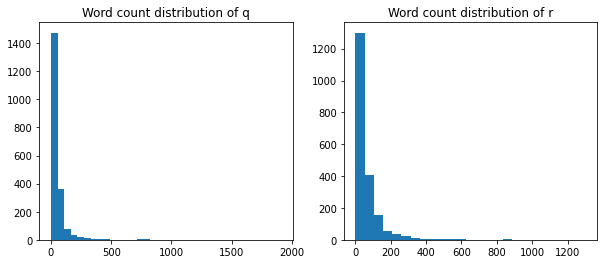

In [12]:
# Word count distribution
def testWordCountDist(df):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.hist(df["q_count"], bins=35)
    ax0.set_title('Word count distribution of q')

    ax1.hist(df["r_count"], bins=25)
    ax1.set_title('Word count distribution of r')

    plt.show()

testWordCountDist(test_raw)

### **Training Set**

In [13]:
# Remove data that has more than 1000 words
train = train[(train.q_count < 1000) & (train.r_count < 1000)]
train.shape

(7950, 11)

In [14]:
train.describe()

,id,q_count,r_count,q_sum_count,r_sum_count,qr_sum_count
count,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000,7950.000000
mean,5020.079748,52.370818,61.822138,24.900000,26.224654,51.124654
std,2925.420790,73.822480,79.069646,20.068324,24.248086,35.228716
min,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,2428.250000,17.000000,18.000000,13.000000,13.000000,31.000000
50%,5031.500000,31.000000,38.000000,21.000000,21.000000,44.000000
75%,7579.750000,57.000000,75.000000,31.000000,32.000000,61.000000
max,10003.000000,958.000000,925.000000,455.000000,396.000000,570.000000


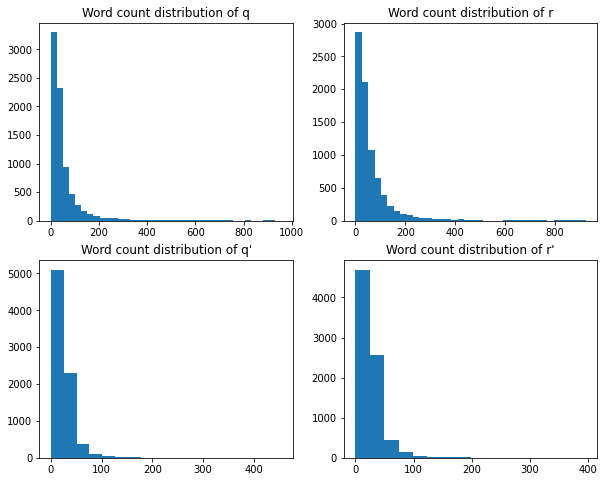

In [15]:
# Word count distribution
def wordCountDist(df, binq, binr, binqq, binrr):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

    ax0.hist(df["q_count"], bins=binq)
    ax0.set_title('Word count distribution of q')

    ax1.hist(df["r_count"], bins=binr)
    ax1.set_title('Word count distribution of r')

    ax2.hist(df["q_sum_count"], bins=binqq)
    ax2.set_title('Word count distribution of q\'')

    ax3.hist(df["r_sum_count"], bins=binrr)
    ax3.set_title('Word count distribution of r\'')

    plt.show()

wordCountDist(train, 38, 36, 18, 16) # about 25 tokens for each bin

## **Evaluation - LCS**

In [16]:
# Tokenize
def tokenization(text1: str, text2: str):
    text1 = [i for i in nltk.word_tokenize(text1) if len(i)>1 or i not in string.punctuation]
    text2 = [i for i in nltk.word_tokenize(text2) if len(i)>1 or i not in string.punctuation]
    return text1, text2

In [17]:
# LCS
def longestCommonSubsequence(text1: str, text2: str) -> int:
    text1, text2 = tokenization(text1, text2)
    if len(text2) > len(text1):
        text1, text2 = text2, text1
    lcs = [[0]*(len(text2)+1) for _ in range(2)]
    for i in range(1, len(text1)+1):
        for j in range(1, len(text2)+1):
            if text1[i-1]== text2[j-1]:
                lcs[i%2][j] = lcs[(i-1) % 2][j-1] +1
            else:
                lcs[i%2][j]= max(lcs[(i-1)%2][j], lcs[i % 2][j-1])
    return lcs[len(text1)% 2][len(text2)]

In [18]:
# LCS score
def lcs_score(text1: str, text2: str):
  lcs = longestCommonSubsequence(text1, text2)
  text1, text2 = tokenization(text1, text2)
  return lcs / (len(text1)+len(text2)-lcs)

## **Baseline LCS Score**

In [19]:
train.reset_index(drop=True, inplace=True)

In [20]:
# Calculate the average LCS score of (q, q') or (r, r')
train['baseline_q'] = 0
train['baseline_r'] = 0
for i in range(len(train)):
    train.loc[i, 'baseline_q'] = lcs_score(train.iloc[i]['q'], train.iloc[i]['q\''])
    train.loc[i, 'baseline_r'] = lcs_score(train.iloc[i]['r'], train.iloc[i]['r\''])
train

<ipython-input-20-ac16764232a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['baseline_q'] = 0
<ipython-input-20-ac16764232a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['baseline_r'] = 0
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,id,q,r,s,q',r',q_count,r_count,q_sum_count,r_sum_count,qr_sum_count,baseline_q,baseline_r
0,8,It can go both ways . We all doubt . It is wha...,True .,AGREE,It can go both ways . We all doubt . It is wha...,True,17,1,17,1,18,1.000000,1.000000
1,9,"once again , you seem to support the killing o...",based on the idea that people are dispensible ...,AGREE,seem to support the killing of certain people,based on the idea that people are dispensible ...,14,58,8,14,22,0.533333,0.241379
2,10,"I personly would not condone an abortion , how...","This is a pretty touchy issue , and I agree wi...",AGREE,"personly would not condone an abortion , howev...","This is a pretty touchy issue , and I agree wi...",244,293,70,45,115,0.286885,0.157718
3,11,"First , there is no `` us `` on your part rega...","Ah , I see . Your reasons are secret reasons ....",DISAGREE,You should be giving justification for wanting...,Your reasons are secret reasons . On a debate ...,210,360,43,45,88,0.197248,0.123324
4,12,alright how did evolution start ?,See above,DISAGREE,alright how did evolution start ?,See above,5,2,5,2,7,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,9999,The ID movements form of ID states that there ...,"That , of course , is the logical fallacy know...",DISAGREE,The ID movements form of ID states that there ...,"of course , is the logical fallacy known as 'P...",129,151,29,17,46,0.233083,0.122581
7946,10000,"For me , it would therefore have made no diffe...",It logically follows from the moral foundation...,AGREE,it would therefore have made no difference if ...,It logically follows from the moral foundation...,101,54,25,21,46,0.242718,0.410714
7947,10001,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",DISAGREE,good thing this argument has never been done !...,"And teen sex does n't , by the very nature of ...",39,37,18,26,44,0.475000,0.684211
7948,10002,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,DISAGREE,"I know one thing , anything that happens , pol...",Was n't sinjin crowing about his plans to take...,114,46,16,14,30,0.140351,0.291667


## **Find the Best Threshold**

In [21]:
def qMeanLCS(df, threshold):
  train_q_small = df[df['q_count'] <= threshold]
  return train_q_small['baseline_q'].mean()

def rMeanLCS(df, threshold):
  train_r_small = df[df['r_count'] <= threshold]
  return train_r_small['baseline_r'].mean()

def meanLCS(df, threshold):
  train_q_small = df[df['q_count'] <= threshold]
  train_r_small = df[df['r_count'] <= threshold]
  item = {'threshold': threshold,
    'baseline_q': train_q_small['baseline_q'].mean(),
    'baseline_r': train_r_small['baseline_r'].mean(),
  }
  item_df = pd.DataFrame(item, index=[0])
  return item_df

In [22]:
thresholdLCS = pd.DataFrame(columns=['threshold','baseline_q','baseline_r'])
for i in range(15,60):
  thresholdLCS = thresholdLCS.append(meanLCS(train, i))

In [23]:
thresholdLCS

,threshold,baseline_q,baseline_r
0,15,0.945645,0.957173
0,16,0.944111,0.955515
0,17,0.940979,0.952026
0,18,0.937745,0.949701
0,19,0.934619,0.946920
0,20,0.931096,0.943007
0,21,0.926778,0.938196
0,22,0.924462,0.935228
0,23,0.920834,0.930822
0,24,0.917747,0.927493


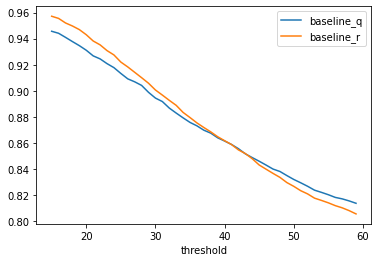

In [24]:
thresholdLCS.plot(x='threshold', y=['baseline_q', 'baseline_r'])
plt.show()

In [25]:
threshold = 15
print("q:",qMeanLCS(train, threshold))
print("r:",rMeanLCS(train, threshold))

q: 0.945644601563904
r: 0.9571729506617956


In [26]:
threshold = 25
print("q:",qMeanLCS(train, threshold))
print("r:",rMeanLCS(train, threshold))

q: 0.9132991007582846
r: 0.9220192032674062


In [27]:
threshold = 30
print("q:",qMeanLCS(train, threshold))
print("r:",rMeanLCS(train, threshold))

q: 0.8944066867127011
r: 0.9006037585663026


In [28]:
threshold = 40
print("q:",qMeanLCS(train, threshold))
print("r:",rMeanLCS(train, threshold))

q: 0.8614513885075015
r: 0.8617105531686211


In [29]:
threshold = 45
print("q:",qMeanLCS(train, threshold))
print("r:",rMeanLCS(train, threshold))

q: 0.8459544398783289
r: 0.843070866960107
